<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/RegressionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

%matplotlib inline

#Loading the Taxi Tip Dataset

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00


#EDA and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [ ]:
df.isnull().sum()

,0
VendorID,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
mta_tax,0


In [ ]:
correlation_values = df.corr()['tip_amount'].drop('tip_amount')

<Axes: >

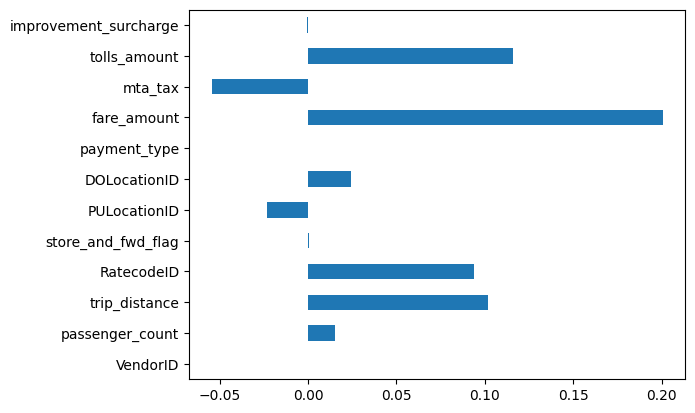

In [ ]:
correlation_values.plot(kind='barh')

In [ ]:
df = df.drop(['improvement_surcharge', 'store_and_fwd_flag', 'payment_type', 'VendorID'], axis=1)

##Normalization

In [ ]:
X = df.drop('tip_amount', axis=1).values
y = df['tip_amount'].values

* It rescales the data to a fixed range, usually [0, 1].
* normalized_x = (x - x_min) / (x_max - x_min).
* It is used when we need data in a bounded region whereas standardization is used when data has outliers.


In [ ]:
# normalize(X, axis=1, norm='l1', copy=False)

In [ ]:
X.sum(axis=1)

array([394.07, 467.96, 278.25, ..., 366.75, 462.72, 399.26])

In [ ]:
y

array([16.54, 16.19, 12.  , ...,  8.  , 16.19,  4.13])

#Modelling

##Splitting Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

##Training the Regression Tree

In [ ]:
taxiTipTree = DecisionTreeRegressor(criterion = 'squared_error', max_depth=4, random_state=40)

In [ ]:
taxiTipTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=40)

##Evaluation

In [ ]:
y_pred = taxiTipTree.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(4.847963115943536)

##Visualization

[Text(0.3958333333333333, 0.9, 'fare_amount <= 60.2\nsquared_error = 25.524\nsamples = 28841\nvalue = 14.12'),
 Text(0.125, 0.7, 'fare_amount <= 4.4\nsquared_error = 20.756\nsamples = 507\nvalue = 8.112'),
 Text(0.26041666666666663, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 65.55'),
 Text(0.16666666666666666, 0.5, 'fare_amount <= 34.85\nsquared_error = 14.264\nsamples = 506\nvalue = 7.999'),
 Text(0.08333333333333333, 0.3, 'trip_distance <= 6.55\nsquared_error = 4.039\nsamples = 176\nvalue = 4.868'),
 Text(0.041666666666666664, 0.1, 'squared_error = 3.329\nsamples = 135\nvalue = 4.385'),
 Text(0.125, 0.1, 'squared_error = 3.07\nsamples = 41\nvalue = 6.461'),
 Text(0.25, 0.3, 'trip_distance <= 11.785\nsquared_error = 11.706\nsamples = 330\nvalue = 9.668'),
 Text(0.20833333333333334, 0.1, 'squared_error = 10.228\nsamples = 248\nvalue = 9.257'),
 Text(0.2916666666666667, 0.1, 'squared_error = 14.115\nsamples = 82\nvalue = 10.912'),
 Text(0.

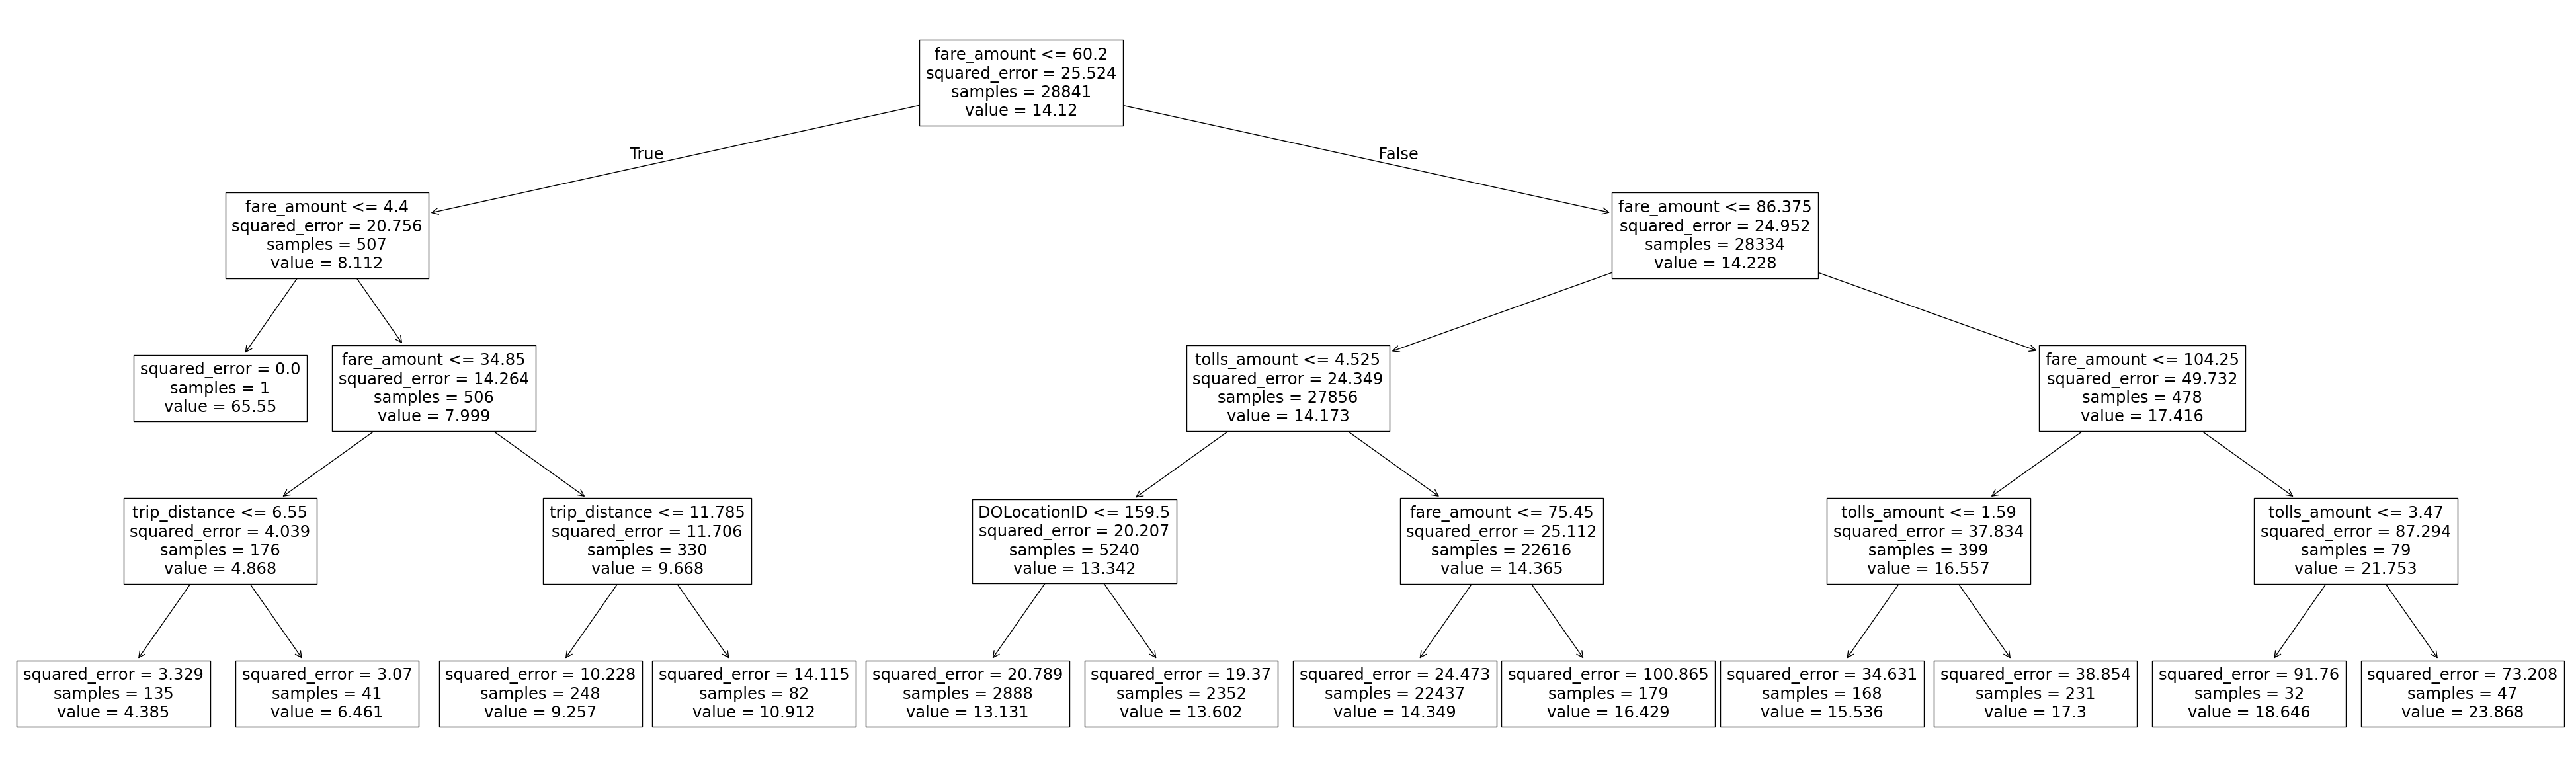

In [ ]:
plt.figure(figsize=(50, 15))
plot_tree(taxiTipTree, feature_names=df.columns)